In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split


import keras
from keras.models import Sequential
from keras.layers import ReLU,Softmax,Dropout,Dense,LeakyReLU,ELU,PReLU


In [10]:
df=pd.read_csv('D:\\python\\winequality-red.csv')

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

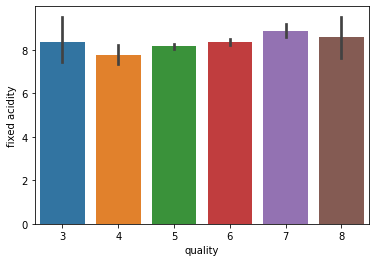

In [15]:
sns.barplot(x='quality',y='fixed acidity',data=df)

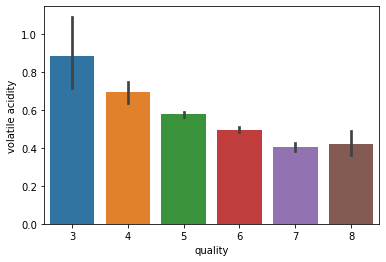

In [16]:
sns.barplot(x='quality',y='volatile acidity',data=df)

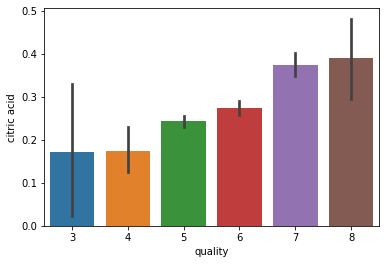

In [17]:
sns.barplot(x='quality',y='citric acid',data=df) 

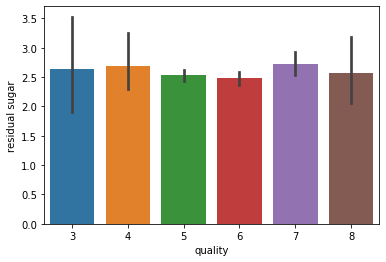

In [18]:
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

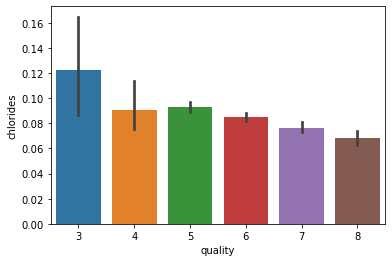

In [19]:
sns.barplot(x = 'quality', y = 'chlorides', data = df)

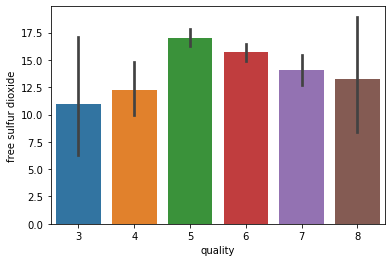

In [20]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

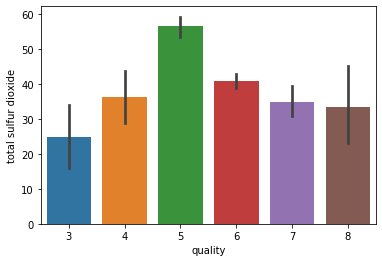

In [21]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

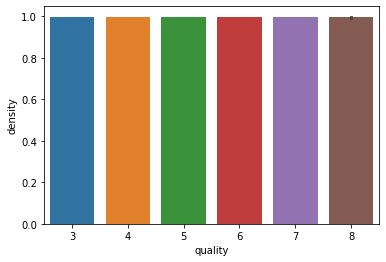

In [22]:
sns.barplot(x = 'quality', y = 'density', data = df)

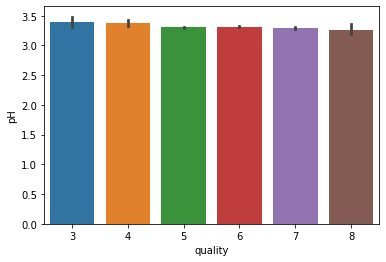

In [23]:
sns.barplot(x = 'quality', y = 'pH', data = df)

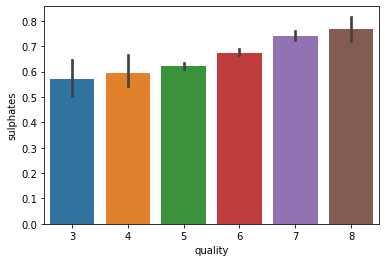

In [24]:
sns.barplot(x = 'quality', y = 'sulphates', data = df)

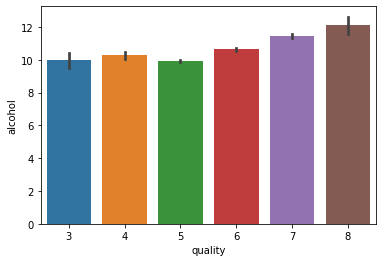

In [25]:
sns.barplot(x = 'quality', y = 'alcohol', data = df)

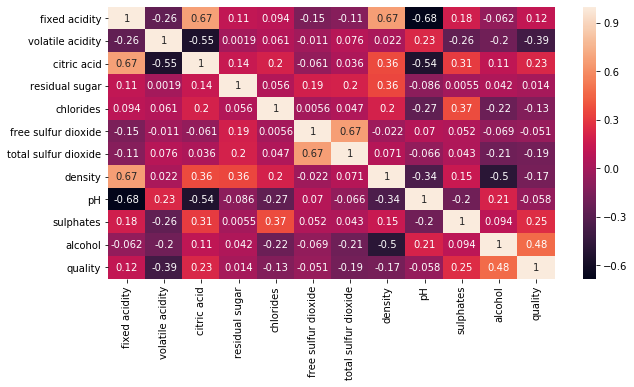

In [26]:
plt.figure(figsize=(10,5))
corr=df.corr()
sns.heatmap(data=corr,annot=True)

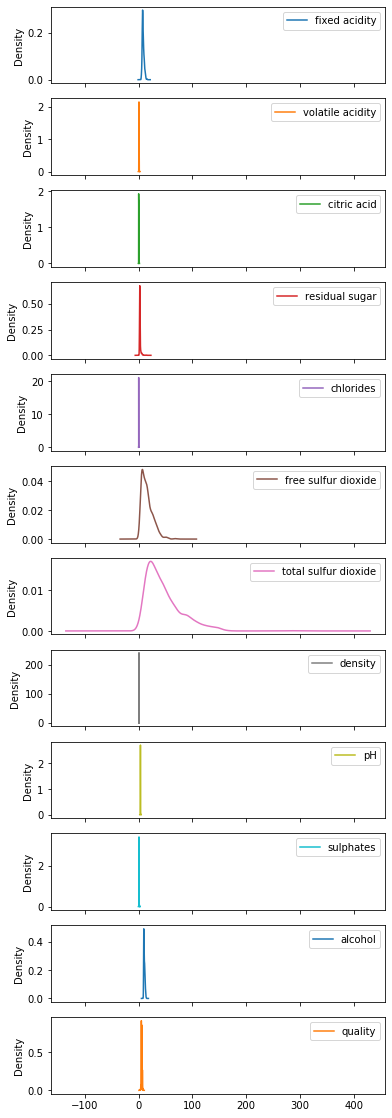

In [35]:
df.plot(kind='kde', subplots=True, figsize=(6,20), sharex=True )
plt.show()

In [38]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

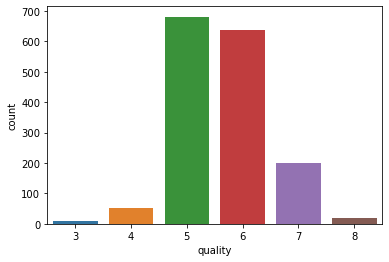

In [36]:
sns.countplot(x='quality',data=df)

In [44]:
# We are going to make segmentation of quality column in 0,1

bins = (2,6.5,8)
group_names = ['bad','good']
df['quality'] = pd.cut(df['quality'],bins=bins, labels=group_names)

In [50]:
encode = LabelEncoder()

In [51]:
df['quality'] = encode.fit_transform(df['quality'])

In [52]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

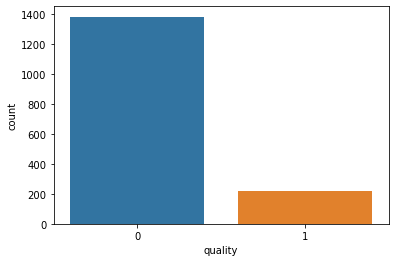

In [53]:
sns.countplot(df['quality'])

In [54]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [55]:
x = df.drop(['quality'],axis=1)
y=df[['quality']]

In [60]:
x.shape

(1599, 11)

In [61]:
y.shape

(1599, 1)

In [62]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

In [64]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

In [65]:
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()

In [66]:
# Applying Model

In [68]:
mymodel = Sequential()

In [69]:
mymodel.add(Dense(units=16, kernel_initializer='he_uniform',activation='relu',input_dim=11))
mymodel.add(Dropout(0.3))

In [70]:
mymodel.add(Dense(units=10,kernel_initializer='he_uniform',activation='sigmoid',input_dim=11))

In [71]:
mymodel.add(Dense(units=14,kernel_initializer='he_uniform',activation='relu',input_dim=11))
mymodel.add(Dropout(0.4))

In [72]:
mymodel.add(Dense(units=20,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [73]:
mymodel.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [74]:
mymodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_3 (Dense)              (None, 14)                154       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [75]:
mymodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
mymodel_history = mymodel.fit(train_x,train_y,validation_split=0.33,epochs=300,batch_size=16)

Train on 856 samples, validate on 423 samples
Epoch 1/300
856/856 [==============================] - ETA: 0s - loss: 0.2892 - accuracy: 0.86 - 0s 342us/step - loss: 0.2888 - accuracy: 0.8645 - val_loss: 0.2832 - val_accuracy: 0.8818
Epoch 2/300
856/856 [==============================] - 0s 414us/step - loss: 0.2900 - accuracy: 0.8621 - val_loss: 0.2861 - val_accuracy: 0.8960
Epoch 3/300
856/856 [==============================] - 0s 395us/step - loss: 0.2833 - accuracy: 0.8575 - val_loss: 0.2779 - val_accuracy: 0.8842
Epoch 4/300
856/856 [==============================] - 0s 362us/step - loss: 0.2802 - accuracy: 0.8750 - val_loss: 0.2783 - val_accuracy: 0.8842
Epoch 5/300
856/856 [==============================] - 0s 265us/step - loss: 0.2890 - accuracy: 0.8575 - val_loss: 0.2880 - val_accuracy: 0.8983
Epoch 6/300
856/856 [==============================] - 0s 245us/step - loss: 0.2901 - accuracy: 0.8551 - val_loss: 0.2818 - val_accuracy: 0.8983
Epoch 7/300
856/856 [=====================

856/856 [==============================] - 0s 314us/step - loss: 0.2907 - accuracy: 0.8692 - val_loss: 0.2813 - val_accuracy: 0.9007
Epoch 57/300
856/856 [==============================] - 0s 336us/step - loss: 0.2861 - accuracy: 0.8657 - val_loss: 0.2782 - val_accuracy: 0.8960
Epoch 58/300
856/856 [==============================] - 0s 274us/step - loss: 0.2816 - accuracy: 0.8657 - val_loss: 0.2805 - val_accuracy: 0.8936
Epoch 59/300
856/856 [==============================] - 0s 286us/step - loss: 0.2881 - accuracy: 0.8621 - val_loss: 0.2923 - val_accuracy: 0.8983
Epoch 60/300
856/856 [==============================] - 0s 233us/step - loss: 0.2812 - accuracy: 0.8680 - val_loss: 0.2831 - val_accuracy: 0.9007
Epoch 61/300
856/856 [==============================] - 0s 193us/step - loss: 0.2902 - accuracy: 0.8703 - val_loss: 0.2808 - val_accuracy: 0.8960
Epoch 62/300
856/856 [==============================] - 0s 241us/step - loss: 0.2867 - accuracy: 0.8668 - val_loss: 0.2758 - val_accuracy

856/856 [==============================] - 0s 275us/step - loss: 0.2823 - accuracy: 0.8715 - val_loss: 0.2824 - val_accuracy: 0.9007
Epoch 113/300
856/856 [==============================] - 0s 221us/step - loss: 0.2830 - accuracy: 0.8668 - val_loss: 0.2773 - val_accuracy: 0.8913
Epoch 114/300
856/856 [==============================] - 0s 223us/step - loss: 0.2815 - accuracy: 0.8703 - val_loss: 0.2914 - val_accuracy: 0.8960
Epoch 115/300
856/856 [==============================] - 0s 328us/step - loss: 0.2809 - accuracy: 0.8610 - val_loss: 0.2829 - val_accuracy: 0.9007
Epoch 116/300
856/856 [==============================] - 0s 212us/step - loss: 0.2780 - accuracy: 0.8715 - val_loss: 0.2857 - val_accuracy: 0.8960
Epoch 117/300
856/856 [==============================] - 0s 329us/step - loss: 0.2794 - accuracy: 0.8715 - val_loss: 0.2837 - val_accuracy: 0.8936
Epoch 118/300
856/856 [==============================] - 0s 223us/step - loss: 0.2892 - accuracy: 0.8715 - val_loss: 0.2907 - val_ac

856/856 [==============================] - 0s 290us/step - loss: 0.2703 - accuracy: 0.8808 - val_loss: 0.2810 - val_accuracy: 0.9007
Epoch 168/300
856/856 [==============================] - 0s 407us/step - loss: 0.2836 - accuracy: 0.8738 - val_loss: 0.3008 - val_accuracy: 0.8983
Epoch 169/300
856/856 [==============================] - ETA: 0s - loss: 0.2802 - accuracy: 0.87 - 0s 406us/step - loss: 0.2826 - accuracy: 0.8703 - val_loss: 0.2956 - val_accuracy: 0.9007
Epoch 170/300
856/856 [==============================] - 0s 451us/step - loss: 0.2769 - accuracy: 0.8703 - val_loss: 0.2948 - val_accuracy: 0.8960
Epoch 171/300
856/856 [==============================] - 0s 332us/step - loss: 0.2646 - accuracy: 0.8727 - val_loss: 0.2790 - val_accuracy: 0.8936
Epoch 172/300
856/856 [==============================] - 0s 365us/step - loss: 0.2722 - accuracy: 0.8715 - val_loss: 0.2829 - val_accuracy: 0.8865
Epoch 173/300
856/856 [==============================] - 0s 253us/step - loss: 0.2731 - ac

Epoch 222/300
856/856 [==============================] - 0s 305us/step - loss: 0.2713 - accuracy: 0.8762 - val_loss: 0.2784 - val_accuracy: 0.9007
Epoch 223/300
856/856 [==============================] - 0s 249us/step - loss: 0.2746 - accuracy: 0.8680 - val_loss: 0.2855 - val_accuracy: 0.9031
Epoch 224/300
856/856 [==============================] - 0s 257us/step - loss: 0.2803 - accuracy: 0.8633 - val_loss: 0.2919 - val_accuracy: 0.9007
Epoch 225/300
856/856 [==============================] - 0s 261us/step - loss: 0.2851 - accuracy: 0.8668 - val_loss: 0.2938 - val_accuracy: 0.8983
Epoch 226/300
856/856 [==============================] - 0s 244us/step - loss: 0.2803 - accuracy: 0.8738 - val_loss: 0.2891 - val_accuracy: 0.8960
Epoch 227/300
856/856 [==============================] - 0s 287us/step - loss: 0.2655 - accuracy: 0.8715 - val_loss: 0.2842 - val_accuracy: 0.8983
Epoch 228/300
856/856 [==============================] - 0s 219us/step - loss: 0.2747 - accuracy: 0.8773 - val_loss: 0

856/856 [==============================] - 0s 286us/step - loss: 0.2714 - accuracy: 0.8633 - val_loss: 0.2886 - val_accuracy: 0.8747
Epoch 278/300
856/856 [==============================] - 0s 298us/step - loss: 0.2740 - accuracy: 0.8621 - val_loss: 0.2802 - val_accuracy: 0.8960
Epoch 279/300
856/856 [==============================] - 0s 299us/step - loss: 0.2722 - accuracy: 0.8703 - val_loss: 0.2877 - val_accuracy: 0.8889
Epoch 280/300
856/856 [==============================] - 0s 283us/step - loss: 0.2805 - accuracy: 0.8692 - val_loss: 0.2768 - val_accuracy: 0.8983
Epoch 281/300
856/856 [==============================] - 0s 285us/step - loss: 0.2704 - accuracy: 0.8785 - val_loss: 0.2826 - val_accuracy: 0.9031
Epoch 282/300
856/856 [==============================] - 0s 224us/step - loss: 0.2702 - accuracy: 0.8785 - val_loss: 0.2821 - val_accuracy: 0.9007
Epoch 283/300
856/856 [==============================] - 0s 280us/step - loss: 0.2835 - accuracy: 0.8668 - val_loss: 0.2827 - val_ac

In [80]:
mymodel.evaluate(test_x, test_y)


320/320 [==============================] - 0s 50us/step


[0.29220601320266726, 0.8374999761581421]

In [81]:
my_predict = mymodel.predict(test_x)
my_predict

array([[0.07061958],
       [0.01633111],
       [0.50825006],
       [0.06171107],
       [0.6117228 ],
       [0.01452994],
       [0.05197546],
       [0.58095926],
       [0.01195696],
       [0.01071188],
       [0.04981217],
       [0.06532422],
       [0.17582265],
       [0.01231873],
       [0.06096408],
       [0.57887655],
       [0.46200928],
       [0.14501536],
       [0.1941824 ],
       [0.01916081],
       [0.5557743 ],
       [0.03103203],
       [0.12491077],
       [0.45051458],
       [0.07837006],
       [0.00985473],
       [0.02016479],
       [0.59314287],
       [0.01968136],
       [0.5072048 ],
       [0.59303415],
       [0.20981523],
       [0.03878361],
       [0.03212211],
       [0.08240604],
       [0.56195205],
       [0.01876256],
       [0.063703  ],
       [0.6168285 ],
       [0.28360236],
       [0.03699249],
       [0.45051458],
       [0.49616152],
       [0.4831165 ],
       [0.4306723 ],
       [0.00797638],
       [0.09111065],
       [0.208

In [82]:
np.round(my_predict)


array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [90]:
pred_y = mymodel.predict(test_x)
pred_y = (pred_y>0.5)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(test_y,pred_y)
cm

array([[252,  38],
       [ 14,  16]], dtype=int64)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


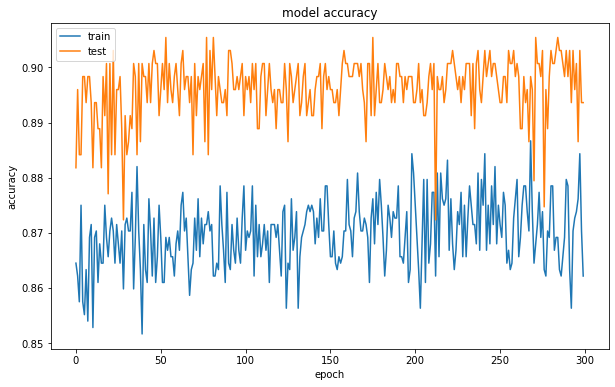

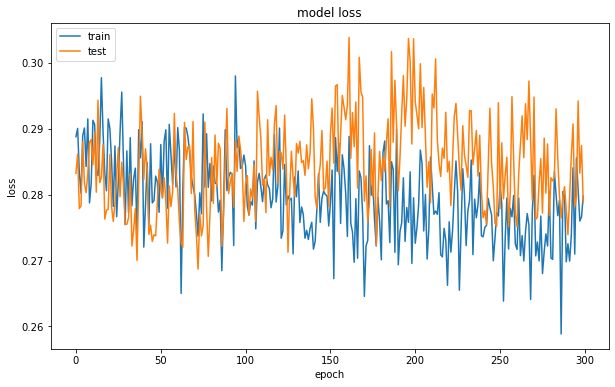

In [88]:
# list all data in history
print(mymodel_history.history.keys())
# summarize history for accuracy
fig = plt.figure(figsize = (10,6))
plt.plot(mymodel_history.history['accuracy'])
plt.plot(mymodel_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (10,6))
plt.plot(mymodel_history.history['loss'])
plt.plot(mymodel_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()